# 2. Multiple linear regressions

In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv("c3_marketing-campaign.csv")
print("data_df shape:", data_df.shape)

data_df shape: (50, 4)


In [2]:
data_df.head()

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204
1,9.359,1.706,1.071,4.800
2,5.261,2.538,2.438,3.970
3,8.682,2.092,1.283,5.212
4,11.736,1.660,1.800,5.993


__Implementation with Scipy__

In [3]:
# Extract input matrix X
X = data_df.drop("sales", axis=1).values
print("X:", X.shape)

X: (50, 3)


In [4]:
# Extract target vector y
y = data_df.sales.values
print("y:", y.shape)

y: (50,)


In [5]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
w, rss, _, _ = lstsq(X, y)
print("w:", w)
print("RSS:", rss)

w: [0.3958359  0.47521518 0.31040001]
RSS: 1.6884039033000031


__Adding the intercept term__

In [6]:
import numpy as np

# Add a column of ones
X1 = np.c_[np.ones(X.shape[0]),  # Vector of ones of shape (n,)
           X]                    # X matrix of shape (n,p)

X1[:5, :]

array([[ 1.   ,  0.916,  1.689,  0.208],
       [ 1.   ,  9.359,  1.706,  1.071],
       [ 1.   ,  5.261,  2.538,  2.438],
       [ 1.   ,  8.682,  2.092,  1.283],
       [ 1.   , 11.736,  1.66 ,  1.8  ]])

In [7]:
w, rss, _, _ = lstsq(X1, y)

print("w:", w)
print("RSS:", rss)

w: [0.02487092 0.39465146 0.47037002 0.30669954]
RSS: 1.6854508680824716


In [8]:
# Compute predictions
y_pred = np.matmul(X1, w)
print("y_pred:", y_pred.shape)

y_pred: (50,)


In [9]:
# Verify RSS score
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


rss = RSS(y, y_pred)
print("RSS:", rss)

RSS: 1.6854508680824707


# 3. R^2 coefficient

In [10]:
import pandas as pd

# Load data
data_df = pd.read_csv("c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

In [11]:
import numpy as np

# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 100.86060792


In [12]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
X1 = np.c_[np.ones(X.shape[0]), X]
w, model_rss, _, _ = lstsq(X1, y)
print("RSS:", model_rss)  # ~1.685


RSS: 1.6854508680824716


In [13]:
# R^2 coefficient
R2 = 1 - (model_rss / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.983

R^2 coefficient: 0.9832893048848236


In [14]:
# R^2 of simple linear regression model
R2 = 1 - (15.74 / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.844

R^2 coefficient: 0.8439430385697798


__Summary__

Here are a few takeaways about the R2 coefficient.

- Intuitively, it measures how well a model performs compared to the constant mean baseline
- It is always smaller than or equal to one. Ideally, it should be close to one
- The coefficient is defined as the proportion of variance explained by the model


# 4. Ordinary least squares

__OLS onf the marketing campaign dataset__

In [15]:
import pandas as pd

# Load data
data_df = pd.read_csv("c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

In [16]:
import numpy as np

# Create X1 matrix
X1 = np.c_[np.ones(X.shape[0]),  # Column of ones, shape: (n,)
           X]                    # Input matrix, shape: (n,p)

In [17]:
# Compute OLS solution
XX = np.matmul(X1.T, X1)
Xy = np.matmul(X1.T, y)
w = np.matmul(np.linalg.inv(XX), Xy)

print("w:", w)

w: [0.02487092 0.39465146 0.47037002 0.30669954]


In [18]:
from scipy.linalg import lstsq

# Verify with Scipy lstsq
w, _, _, _ = lstsq(X1, y)

print("w:", w)

w: [0.02487092 0.39465146 0.47037002 0.30669954]


__OLS using Scikit-learn LinearRegression__

In [20]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

# Print coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [0.39465146 0.47037002 0.30669954]
Intercept: 0.024870917888195176


__Predict and score functions__

In [21]:
# Compute predictions
y_pred = lr.predict(X)
y_pred[:3]

array([1.24462012, 4.84934038, 4.04266482])

In [22]:
import numpy as np

y_pred = np.matmul(X, lr.coef_) + lr.intercept_
y_pred[:3]

array([1.24462012, 4.84934038, 4.04266482])

In [23]:
# Compute the R2 coefficient
R2 = lr.score(X, y)
print("R2:", R2)

R2: 0.9832893048848236


__SGDRegressor__

In [25]:
from sklearn.linear_model import SGDRegressor

# Create the SGDRegressor object
lr_sgd = SGDRegressor(
    loss="squared_error",  # Cost function
    penalty=None,  # Add a penalty term?
    max_iter=1000,  # Number of iterations
    random_state=0,  # The implementation shuffles the data
    tol=1e-3,  # Tolerance for improvement (stop SGD once loss is below)
)

# Fit the linear regression model
lr_sgd.fit(X, y)

# Print coefficients
print("Coefficients:", lr_sgd.coef_)
print("Intercept:", lr_sgd.intercept_)

Coefficients: [0.39968853 0.44409771 0.25894341]
Intercept: [0.12807209]


__Huber loss__

In [26]:
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=1.35)

# Fit it to X,y
huber.fit(X, y)

print("Coefficients:", huber.coef_)
print("Intercept:", huber.intercept_)
print("R^2 coefficient:", huber.score(X, y))

Coefficients: [0.39172544 0.4788203  0.29315421]
Intercept: 0.04586298819193867
R^2 coefficient: 0.9830701571142849


# 7. Ill conditioning

__Collinearity__

In [27]:
import pandas as pd

# Load data
data_df = pd.read_csv("c3_bike-sharing.csv")

# Create Numpy arrays
temp = data_df.temp.values
users = data_df.users.values

# First five rows
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


 The dataset web page states that the original temperatures in degrees Celsius temp_C were rescaled between zero and one using the formula temp=(temp_C+8)/47.

In [28]:
# Create collinear feature
temp_C = 47 * temp - 8

In [29]:
import numpy as np

# Create input matrix X
X = np.c_[temp, temp_C]

# Add a column of ones
X1 = np.c_[np.ones(X.shape[0]), X]

# Compute rank
rank = np.linalg.matrix_rank(X1)
print("Rank", rank)

Rank 2


__Collinearity in practice__

In theory, the OLS solution doesn’t exist when X contains collinear features. However, most machine learning tools can handle these situations and return a vector of parameters ⃗w as if there were no collinear features.

In [30]:
from scipy.linalg import lstsq

# Compute OLS using lstsq
w, rss, rank, _ = lstsq(X1, users)

print("w:", w)
print("rank:", rank)
print("RSS:", rss)

w: [155.34445517  27.10638524  31.24446504]
rank: 2
RSS: []


Let’s compare the performance of this model to a simple linear regression with the R2 coefficient. We can use the r2_score(y,y_pred) function from the Scikit-learn metrics module.

In [31]:
from sklearn.metrics import r2_score

# R^2 coefficient of simple linear regression
coefs = np.polyfit(temp, users, deg=1)
y_pred_normal = np.polyval(coefs, temp)
r2_normal = r2_score(users, y_pred_normal)
print("R^2 normal:", r2_normal)

R^2 normal: 0.5954233080185317


In [32]:
# R^2 coefficient with collinear features
y_pred_collinear = np.matmul(X1, w)
r2_collinear = r2_score(users, y_pred_collinear)
print("R^2 collinear:", r2_collinear)

R^2 collinear: 0.5954233080185318


We can see that collinearity didn’t affect performance in this case.

__Nearly collinear features__

In [33]:
# Convert to degrees Celsius to Fahrenheit
temp_F = 1.8 * temp_C + 32

def compute_ols_with_noise(temp_C, users):

    # Convert to degrees Fahrenheit
    temp_F = 1.8 * temp_C + 32

    # Add small variations
    noise = np.random.normal(loc=0, scale=0.01, size=temp_F.shape)
    temp_F += noise

    # Create input matrix X
    X = np.c_[temp_C, temp_F]

    # Compute OLS using lstsq
    X1 = np.c_[np.ones(X.shape[0]), X]  # Create X1 matrix
    w, rss, rank, _ = lstsq(X1, users)  # OLS

    return w, rss, rank, X1


w, rss, rank, X1 = compute_ols_with_noise(temp_C, users)

print("rank:", rank)  # Returns: 3
print("RMSE:", np.sqrt(rss / len(users)))  # Depends on the noise value
print("w:", w)  # Depends on the noise value

rank: 3
RMSE: 232.83712936575296
w: [51443.6274478   2916.38523868 -1602.5761449 ]


In [34]:
txt_fmt = "{:<5}{:<6}{:<20}{:}"
print(txt_fmt.format("run", "rank", "RMSE", "coefficients"))
for i in range(5):
    w, rss, rank, X1 = compute_ols_with_noise(temp_C, users)  # Compute OLS using lstsq
    print(txt_fmt.format(i, rank, np.sqrt(rss / len(users)), w))

run  rank  RMSE                coefficients
0    3     233.34936732716173  [-9325.36573239  -501.67835788   296.39833645]
1    3     233.10147985141097  [35539.2607797   2021.80976666 -1105.59297291]
2    3     233.25953245019096  [-21987.52523174  -1213.93050069    692.10567284]
3    3     233.3662785027802   [1819.65286986  125.18123435  -51.86548597]
4    3     233.3131573394407   [16591.72345655   956.1194656   -513.49744556]


The coefficients vary a lot. This is due to ill-conditioning.

__Ill-conditioning__

A small change in the data produces very different coefficients. We can quantify this phenomenon with the condition number. Inverting a matrix with a large condition number is numerically unstable.

In [35]:
# Condition number
cn = np.linalg.cond(X1)
print("Condition number:", cn)  # Depends on the noise value

Condition number: 218019.04291452974


In [36]:
# Same with the nearly collinear matrix
y_pred_nearcol = np.matmul(X1, w)
r2_nearcol = r2_score(users, y_pred_nearcol)

# R^2 coefficient with nearly collinear features
print("R^2 nearly collinear:", r2_nearcol)

R^2 nearly collinear: 0.5956096284277995


__Regularization with Ridge estimator__

One way to solve ill-conditioning is to create a constraint on the coefficients. The idea is to modify the objective function and add a regularization term that penalizes large coefficients.

In [39]:
from sklearn.linear_model import Ridge


def compute_with_regularization(temp_C, users):

    # Add small variations
    noise = np.random.normal(loc=0, scale=0.01, size=temp_C.shape)
    temp_F = (1.8 * temp_C + 32) + noise

    # Create input matrix X
    X = np.c_[temp_C, temp_F]

    # Fit a Ridge regression
    ridge = Ridge(alpha=100)
    ridge.fit(X, users)

    return ridge, X

ridge, X = compute_with_regularization(temp_C, users)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("R^2:", ridge.score(X, users))

Coefficients: [ 7.59381395 13.44213916]
Intercept: -269.66991158490043
R^2: 0.5954078754087087


In [40]:
txt_fmt = "{:<5}{:<27}{:<21}{:}"
print(txt_fmt.format("run", "coefficients", "intercept", "R^2"))
for i in range(5):
    ridge, X = compute_with_regularization(temp_C, users)
    print(txt_fmt.format(i, str(list(ridge.coef_.round(8))),
                         ridge.intercept_, ridge.score(X, users)))

run  coefficients               intercept            R^2
0    [7.22800874, 13.64592685]  -276.2067240170078   0.595465551836996
1    [7.67761243, 13.39540561]  -268.16830913616434  0.5953948738988433
2    [7.27169318, 13.62166758]  -275.42668720012614  0.5954586050341959
3    [7.50333745, 13.49164223]  -271.2338793510397   0.5954218659742532
4    [7.44325469, 13.52533251]  -272.3031700692426   0.5954313152496175


# 8. Exercise - Bike sharing linear regression

In [41]:
import pandas as pd
import os

# Load train data
train_df = pd.read_csv("c3_bike-train.csv")
print(train_df.shape)
train_df.head()

(365, 10)


,temp,temp_C,hum,windspeed,atemp,atemp_C,yr,workingday,holiday,casual
0,0.368,9.296,0.569,0.148,0.379,9.014,1,1,0,1603
1,0.700,24.900,0.761,0.084,0.660,27.560,0,1,0,768
2,0.282,5.254,0.538,0.187,0.282,2.612,0,0,0,424
3,0.335,7.745,0.450,0.308,0.320,5.120,0,1,0,231
4,0.398,10.706,0.466,0.290,0.388,9.608,1,1,0,663


In [42]:
# Load test data
test_df = pd.read_csv("c3_bike-test.csv")
print(test_df.shape)
test_df.head()

(366, 10)


,temp,temp_C,hum,windspeed,atemp,atemp_C,yr,workingday,holiday,casual
0,0.687,24.289,0.585,0.208,0.638,26.108,0,0,0,2418
1,0.750,27.250,0.651,0.159,0.687,29.342,0,1,0,754
2,0.233,2.951,0.499,0.158,0.248,0.368,0,0,0,222
3,0.192,1.024,0.830,0.053,0.235,-0.490,0,1,0,47
4,0.342,8.074,0.770,0.073,0.356,7.496,1,1,0,244


In [43]:
import numpy as np

# Remove collinear features
features = [
    "temp",
    "hum",
    "windspeed",
    "yr",
    "workingday",
    "holiday",
    #'atemp', # Nearly collinear column, may hurt performance
    #'temp_C', 'atemp_C' # Collinear columns
]
# Note: You could use atemp instead of temp.

# Create input matrix with the additional column of ones
X = train_df[features].values  # Train data
X1 = np.c_[np.ones(X.shape[0]), X]  # Add the column of ones

# Compute rank and condition number
M = X1.shape[1]  # Number of columns
rank = np.linalg.matrix_rank(X1)
cond = np.linalg.cond(X1)
print("Columns {} rank {} collinear {}".format(M, rank, M - rank))
print("Condition number:", cond)

Columns 7 rank 7 collinear 0
Condition number: 22.00082846294688


In [44]:
# Extract X/y Numpy variables
X_tr = train_df[features].values
y_tr = train_df.casual.values

X_te = test_df[features].values
y_te = test_df.casual.values

In [45]:
# Compare models with mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [46]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)  # Fit to train data
y_pred_lr = np.maximum(
    lr.predict(X_te), 50  # Predictions for test data  # Set a lower limit
)
mae_lr = MAE(y_te, y_pred_lr)
print("MAE linear regression: {:.3f}".format(mae_lr))

MAE linear regression: 279.880


In [47]:
from sklearn.linear_model import HuberRegressor

# Huber loss
huber = HuberRegressor(epsilon=1.45)
huber.fit(X_tr, y_tr)  # Fit to train data
y_pred_huber = np.maximum(
    huber.predict(X_te), 50  # Predictions for test data  # set a lower limit
)
mae_huber = MAE(y_te, y_pred_huber)
print("MAE Huber: {:.3f}".format(mae_huber))

MAE Huber: 272.904


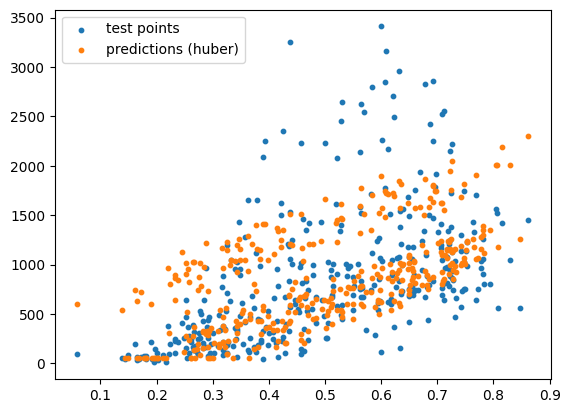

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot models
temp_te = X_te[:, 0]  # 0: temperatures column
plt.scatter(temp_te, y_te, s=10, label="test points")
plt.scatter(temp_te, y_pred_huber, s=10, label="predictions (huber)")
plt.legend()
plt.show()

Data points collected during non-working days have a higher number of casual users than ones collected during working days, which makes sense. 

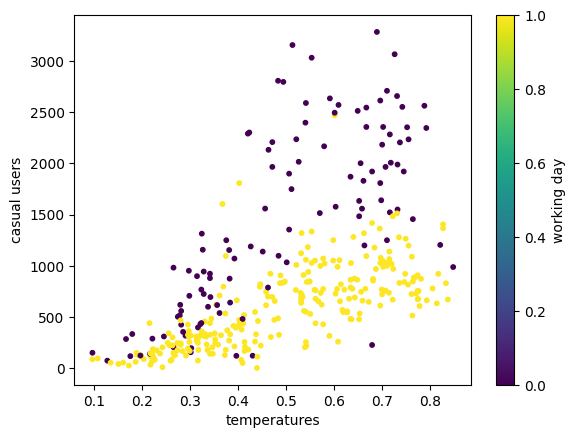

In [49]:
# We can identify two sources
temp_tr = X_tr[:, 0]  # 0: temp column
wd_tr = X_tr[:, 4]  # 4: workingday column

plt.scatter(temp_tr, y_tr, c=wd_tr, s=10)
plt.colorbar(label="working day")
plt.xlabel("temperatures")
plt.ylabel("casual users")
plt.show()

In this case, we say that the data comes from different sources. Hence, it’s a good idea to try separating the data points and fit a different model to each source.

In [50]:
# Separate data points
# * wd: working day
# * nwd: non-working day
columns = [0, 1, 2, 3, 5]  # Also, remove column 4: workingday

# Train set
wd_idx_tr = X_tr[:, 4] == 1  # Entries with workingday == 1

X_tr_wd = X_tr[wd_idx_tr][:, columns]
y_tr_wd = y_tr[wd_idx_tr]

X_tr_nwd = X_tr[~wd_idx_tr][:, columns]
y_tr_nwd = y_tr[~wd_idx_tr]

# Test set
wd_idx_te = X_te[:, 4] == 1  # Entries with workingday == 1

X_te_wd = X_te[wd_idx_te][:, columns]
y_te_wd = y_te[wd_idx_te]

X_te_nwd = X_te[~wd_idx_te][:, columns]
y_te_nwd = y_te[~wd_idx_te]

MAE linear regression: 246.269


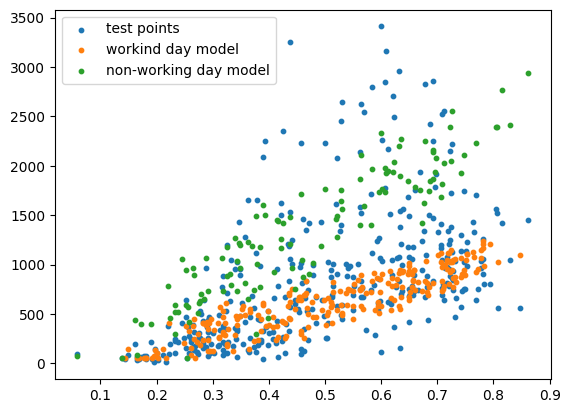

In [51]:
# Linear regression
lr_wd = LinearRegression()  # Model for working days
lr_nwd = LinearRegression()  # Model for non-working days

lr_wd.fit(X_tr_wd, y_tr_wd)  # Fit models to train data
lr_nwd.fit(X_tr_nwd, y_tr_nwd)

y_pred_lr_wd = np.maximum(
    lr_wd.predict(X_te_wd), 50  # Predictions for test data  # set a lower limit
)
y_pred_lr_nwd = np.maximum(
    lr_nwd.predict(X_te_nwd), 50  # Same for non-working days  # set a lower limit
)

# Reassemble test data and predictions
# target values
y_te_wdnwd = np.concatenate((y_te_wd, y_te_nwd))

# predictions
y_pred_lr_wdnwd = np.concatenate((y_pred_lr_wd, y_pred_lr_nwd))

# Compute MAE
mae_lr_wdnwd = MAE(y_te_wdnwd, y_pred_lr_wdnwd)
print("MAE linear regression: {:.3f}".format(mae_lr_wdnwd))

# Plot temperatures for working days and non-working days
temp_te_wdnwd = np.concatenate((X_te_wd[:, 0], X_te_nwd[:, 0]))
plt.scatter(temp_te_wdnwd, y_te_wdnwd, s=10, label="test points")

# Predictions for working days
plt.scatter(X_te_wd[:, 0], y_pred_lr_wd, s=10, label="workind day model")

# Predictions for non-working days
plt.scatter(X_te_nwd[:, 0], y_pred_lr_nwd, s=10, label="non-working day model")

plt.legend()
plt.show()

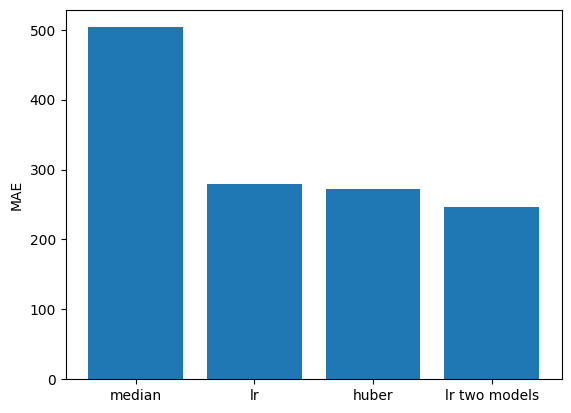

In [52]:
# Create baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Final comparison
mae_values = [mae_baseline, mae_lr, mae_huber, mae_lr_wdnwd]
titles = ["median", "lr", "huber", "lr two models"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()

Compute the $R^{2}$ coefficient of your different models on the test set.

In [53]:
# R2 coefficients
r2_lr = lr.score(X_te, y_te)
r2_huber = huber.score(X_te, y_te)

print("R^2 linear regression:", r2_lr)
print("R^2 huber loss:", r2_huber)

# R2 coefficient when separating sources
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))


rss_lr_wdnwd = RSS(y_te_wdnwd, y_pred_lr_wdnwd)
rss_baseline = RSS(y_te, y_te.mean())
r2_lr_wdnwd = 1 - rss_lr_wdnwd / rss_baseline

print("R^2 when separating sources:", r2_lr_wdnwd)

R^2 linear regression: 0.6680357017933192
R^2 huber loss: 0.6671483619205267
R^2 when separating sources: 0.7250821656146723
